In [ ]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

## Download dataset from Kaggle

In [ ]:
!pip install opendatasets -q

In [ ]:
import opendatasets as od

Dataset Link: https://www.kaggle.com/datasets/andonians/random-linear-regression

In [ ]:
#od.download("https://www.kaggle.com/datasets/andonians/random-linear-regression")

In [ ]:
data = pd.read_csv("data/dataset.csv")

## Data Preprocessing

In [ ]:
data.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [ ]:
data.shape

(300, 2)

In [ ]:
X = data["x"]
Y = data["y"]

In [ ]:
X

0      77
1      21
2      22
3      20
4      36
       ..
295    71
296    46
297    55
298    62
299    47
Name: x, Length: 300, dtype: int64

In [ ]:
X.shape

(300,)

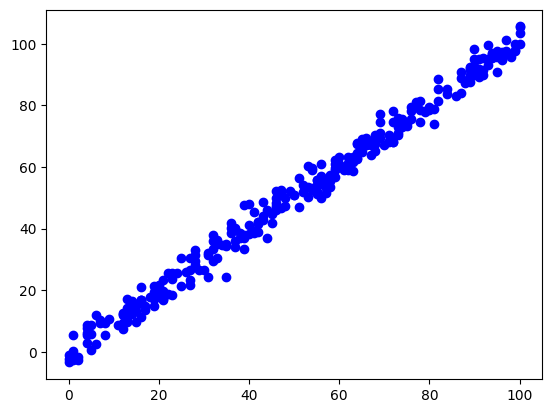

In [ ]:
plt.scatter(X, Y, c = 'b')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
xTrain.shape, xTest.shape

((240,), (60,))

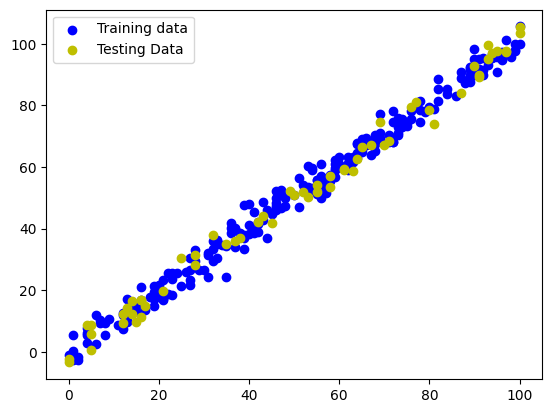

In [ ]:
plt.scatter(xTrain, yTrain, c='b', label='Training data')
plt.scatter(xTest, yTest, c='y', label='Testing Data')
plt.legend()
plt.show()

## Model Building

In [ ]:
yTrain.shape, xTrain.shape

((240,), (240,))

In [ ]:
#create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

#compile the model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.005),
    metrics = ["mae"]
)

#train the model
epoch_number = 10
model_history = model.fit(
    tf.expand_dims(xTrain, axis=-1),
    #xTrain,
    yTrain,
    epochs = epoch_number
)

Epoch 1/10
8/8 [==============================] - 1s 6ms/step - loss: 114.9818 - mae: 114.9818
Epoch 2/10
8/8 [==============================] - 0s 5ms/step - loss: 104.7087 - mae: 104.7087
Epoch 3/10
8/8 [==============================] - 0s 3ms/step - loss: 94.2573 - mae: 94.2573
Epoch 4/10
8/8 [==============================] - 0s 5ms/step - loss: 84.1145 - mae: 84.1145
Epoch 5/10
8/8 [==============================] - 0s 5ms/step - loss: 73.5594 - mae: 73.5594
Epoch 6/10
8/8 [==============================] - 0s 5ms/step - loss: 63.0017 - mae: 63.0017
Epoch 7/10
8/8 [==============================] - 0s 4ms/step - loss: 52.0945 - mae: 52.0945
Epoch 8/10
8/8 [==============================] - 0s 5ms/step - loss: 41.1142 - mae: 41.1142
Epoch 9/10
8/8 [==============================] - 0s 13ms/step - loss: 29.8042 - mae: 29.8042
Epoch 10/10
8/8 [==============================] - 0s 10ms/step - loss: 17.9869 - mae: 17.9869


In [ ]:
xTrain.shape   #1D

(240,)

In [ ]:
tf.expand_dims(xTrain, axis=-1).shape  #2D

TensorShape([240, 1])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 8         
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 13 (52.00 Byte)
Trainable params: 13 (52.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Testing the model

In [ ]:
yPredict = model.predict(xTest)

2/2 [==============================] - 0s 16ms/step


In [ ]:
yPredict[:5]   #predicted values

array([[70.327805],
       [59.666203],
       [73.37397 ],
       [ 5.596648],
       [71.08934 ]], dtype=float32)

In [ ]:
yTest.head(5)     #real/true values

203    92.887723
266    79.503415
152    97.001484
9       8.746748
233    89.739520
Name: y, dtype: float64

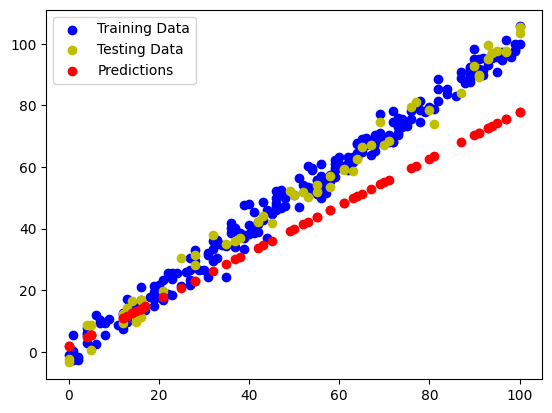

In [ ]:
plt.scatter(xTrain, yTrain, c='b', label='Training Data')
plt.scatter(xTest, yTest, c='y', label='Testing Data')
plt.scatter(xTest, yPredict, c='r', label='Predictions')
plt.legend()
plt.show()

## Evaluate Model

##### Using evaluate method

In [ ]:
# using evaluate method
model.evaluate(xTest, yTest)

2/2 [==============================] - 1s 17ms/step - loss: 10.9048 - mae: 10.9048


[10.904847145080566, 10.904847145080566]

##### Using MAE (Mean Absolute Error)

In [ ]:
# using MAE (Mean Absolute Error)
mae = tf.metrics.mean_absolute_error(yTest, yPredict)
mae                                                                # Wrong method

<tf.Tensor: shape=(60,), dtype=float32, numpy=
array([31.649818, 28.15271 , 32.969826, 45.17836 , 31.979818, 35.19999 ,
       45.863747, 48.605297, 39.253075, 32.98998 , 38.770763, 27.162022,
       40.799114, 31.400278, 32.639828, 35.19999 , 27.378563, 29.349535,
       32.009514, 29.81707 , 28.193981, 34.05767 , 31.106146, 36.689808,
       30.070915, 28.4986  , 35.29999 , 27.489044, 32.639828, 45.17836 ,
       39.735386, 28.650908, 28.968737, 34.05767 , 27.852652, 48.605297,
       33.306652, 27.149105, 27.387506, 28.055727, 31.979818, 29.197199,
       38.770763, 40.256382, 27.28597 , 27.378563, 27.122173, 39.735386,
       38.770763, 45.17836 , 38.311104, 40.799114, 34.309986, 34.309986,
       27.852652, 27.607027, 30.676573, 27.226255, 28.355785, 27.607027],
      dtype=float32)>

In [ ]:
# using MAE (Mean Absolute Error)
mae = tf.metrics.mean_absolute_error(yTest, tf.squeeze(yPredict))
mae                                                              # Correct Method

<tf.Tensor: shape=(), dtype=float32, numpy=10.904846>

In [ ]:
yPredict.shape   #2D

(60, 1)

In [ ]:
tf.squeeze(yPredict).shape  #1D

TensorShape([60])

In [ ]:
yTest.shape   #1D

(60,)

##### Using MSE (Mean Squared Error)

In [ ]:
# Using MSE (Mean Squared Error)
mse = tf.metrics.mean_squared_error(yTest, tf.squeeze(yPredict))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=175.9293>

##### Loss Plot

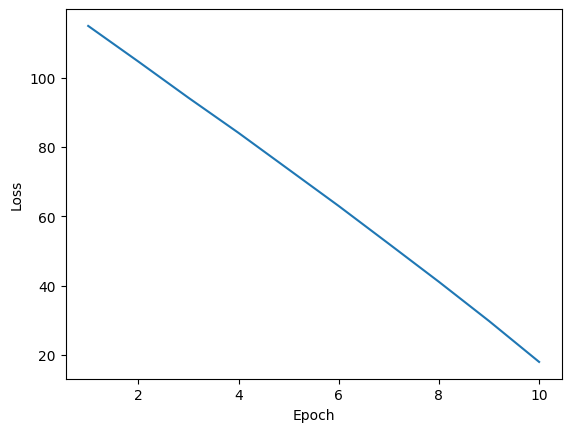

In [ ]:
xRange =range(1,epoch_number+1)
loss = model_history.history['loss']
plt.plot(xRange, loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

## Model Weights and Baises

In [ ]:
# Let's see finalized weight values and bias values

for layer in model.layers:
  weights = layer.get_weights()[0]
  biases = layer.get_weights()[1]
  print(f"\nWeights : \n {weights} \nBiases : \n {biases}")


Weights : 
 [[ 0.6784121   0.56265056 -0.529564    0.19683659]] 
Biases : 
 [-0.36095077  0.44107348 -0.42483482 -0.37203285]

Weights : 
 [[-0.45163116]
 [ 0.9228414 ]
 [-1.3041822 ]
 [-0.72115767]] 
Biases : 
 [0.39652032]


## Save Model

#### Using SavedModel format

In [ ]:
model.save("New_Model_1")

#### Using HDF5 format

In [ ]:
model.save("New_Model_2.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Load a model

In [ ]:
new_model = tf.keras.models.load_model('New_Model_2.h5')

In [ ]:
new_model.predict([150,-10])

1/1 [==============================] - 0s 112ms/step


array([[116.02037  ],
       [ -5.8264956]], dtype=float32)

In [ ]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 8         
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 13 (52.00 Byte)
Trainable params: 13 (52.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
